In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
house_data = pd.read_csv("./kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Look for homes with Auburn Zip Codes 98001, 98002, and 98003

In [56]:
around_auburn = house_data.loc[(house_data['zipcode'] == 98001) | (house_data['zipcode'] == 98002) | (house_data['zipcode'] == 98003), ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'zipcode', 'yr_built']]
around_auburn.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,zipcode,yr_built
6,257500.0,3,2.25,1715,6819,7,98003,1995
18,189000.0,2,1.00,1200,9850,7,98002,1921
19,230000.0,3,1.00,1250,9774,7,98003,1969
25,233000.0,3,2.00,1710,4697,6,98002,1941
38,240000.0,4,1.00,1220,8075,7,98001,1969


In [57]:
around_auburn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 6 to 21598
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        841 non-null    float64
 1   bedrooms     841 non-null    int64  
 2   bathrooms    841 non-null    float64
 3   sqft_living  841 non-null    int64  
 4   sqft_lot     841 non-null    int64  
 5   grade        841 non-null    int64  
 6   zipcode      841 non-null    int64  
 7   yr_built     841 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 59.1 KB


### Hypothesis - the bigger the house, the more expensive it is

In [58]:
around_auburn.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,zipcode,yr_built
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,274227.085612,3.361474,1.980380,1845.562426,11738.683710,7.235434,98001.902497,1976.362663
std,96033.474505,0.783849,0.660471,669.414414,14935.188443,0.879248,0.868774,23.214384
min,95000.000000,0.000000,0.000000,690.000000,1302.000000,5.000000,98001.000000,1903.000000
25%,215000.000000,3.000000,1.500000,1370.000000,7200.000000,7.000000,98001.000000,1962.000000
50%,255000.000000,3.000000,2.000000,1740.000000,8581.000000,7.000000,98002.000000,1976.000000
75%,304500.000000,4.000000,2.500000,2190.000000,11130.000000,8.000000,98003.000000,1993.000000
max,950000.000000,6.000000,5.250000,5774.000000,239580.000000,11.000000,98003.000000,2014.000000


In [59]:
corr = around_auburn.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,zipcode,yr_built
price,1.000000,0.390060,0.573444,0.816977,0.341583,0.741928,0.045468,0.374381
bedrooms,0.390060,1.000000,0.502360,0.591509,-0.033705,0.354844,-0.016361,0.250423
bathrooms,0.573444,0.502360,1.000000,0.692815,-0.035398,0.547629,0.019484,0.577129
sqft_living,0.816977,0.591509,0.692815,1.000000,0.216492,0.692243,0.006782,0.372817
sqft_lot,0.341583,-0.033705,-0.035398,0.216492,1.000000,0.152351,-0.135415,-0.117945
grade,0.741928,0.354844,0.547629,0.692243,0.152351,1.000000,0.100219,0.505745
zipcode,0.045468,-0.016361,0.019484,0.006782,-0.135415,0.100219,1.000000,-0.083599
yr_built,0.374381,0.250423,0.577129,0.372817,-0.117945,0.505745,-0.083599,1.000000


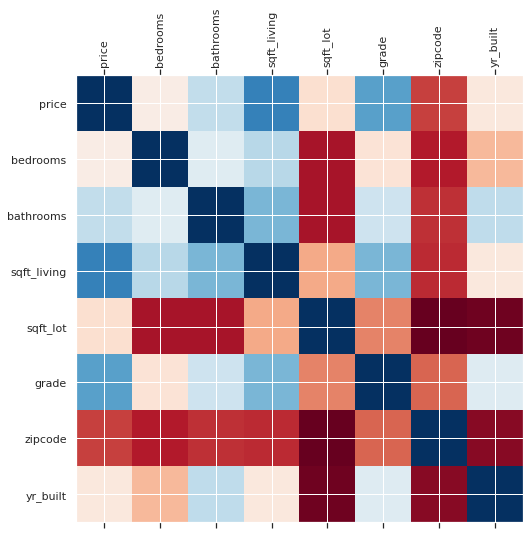

In [60]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical");
plt.yticks(range(len(corr.columns)), corr.columns);

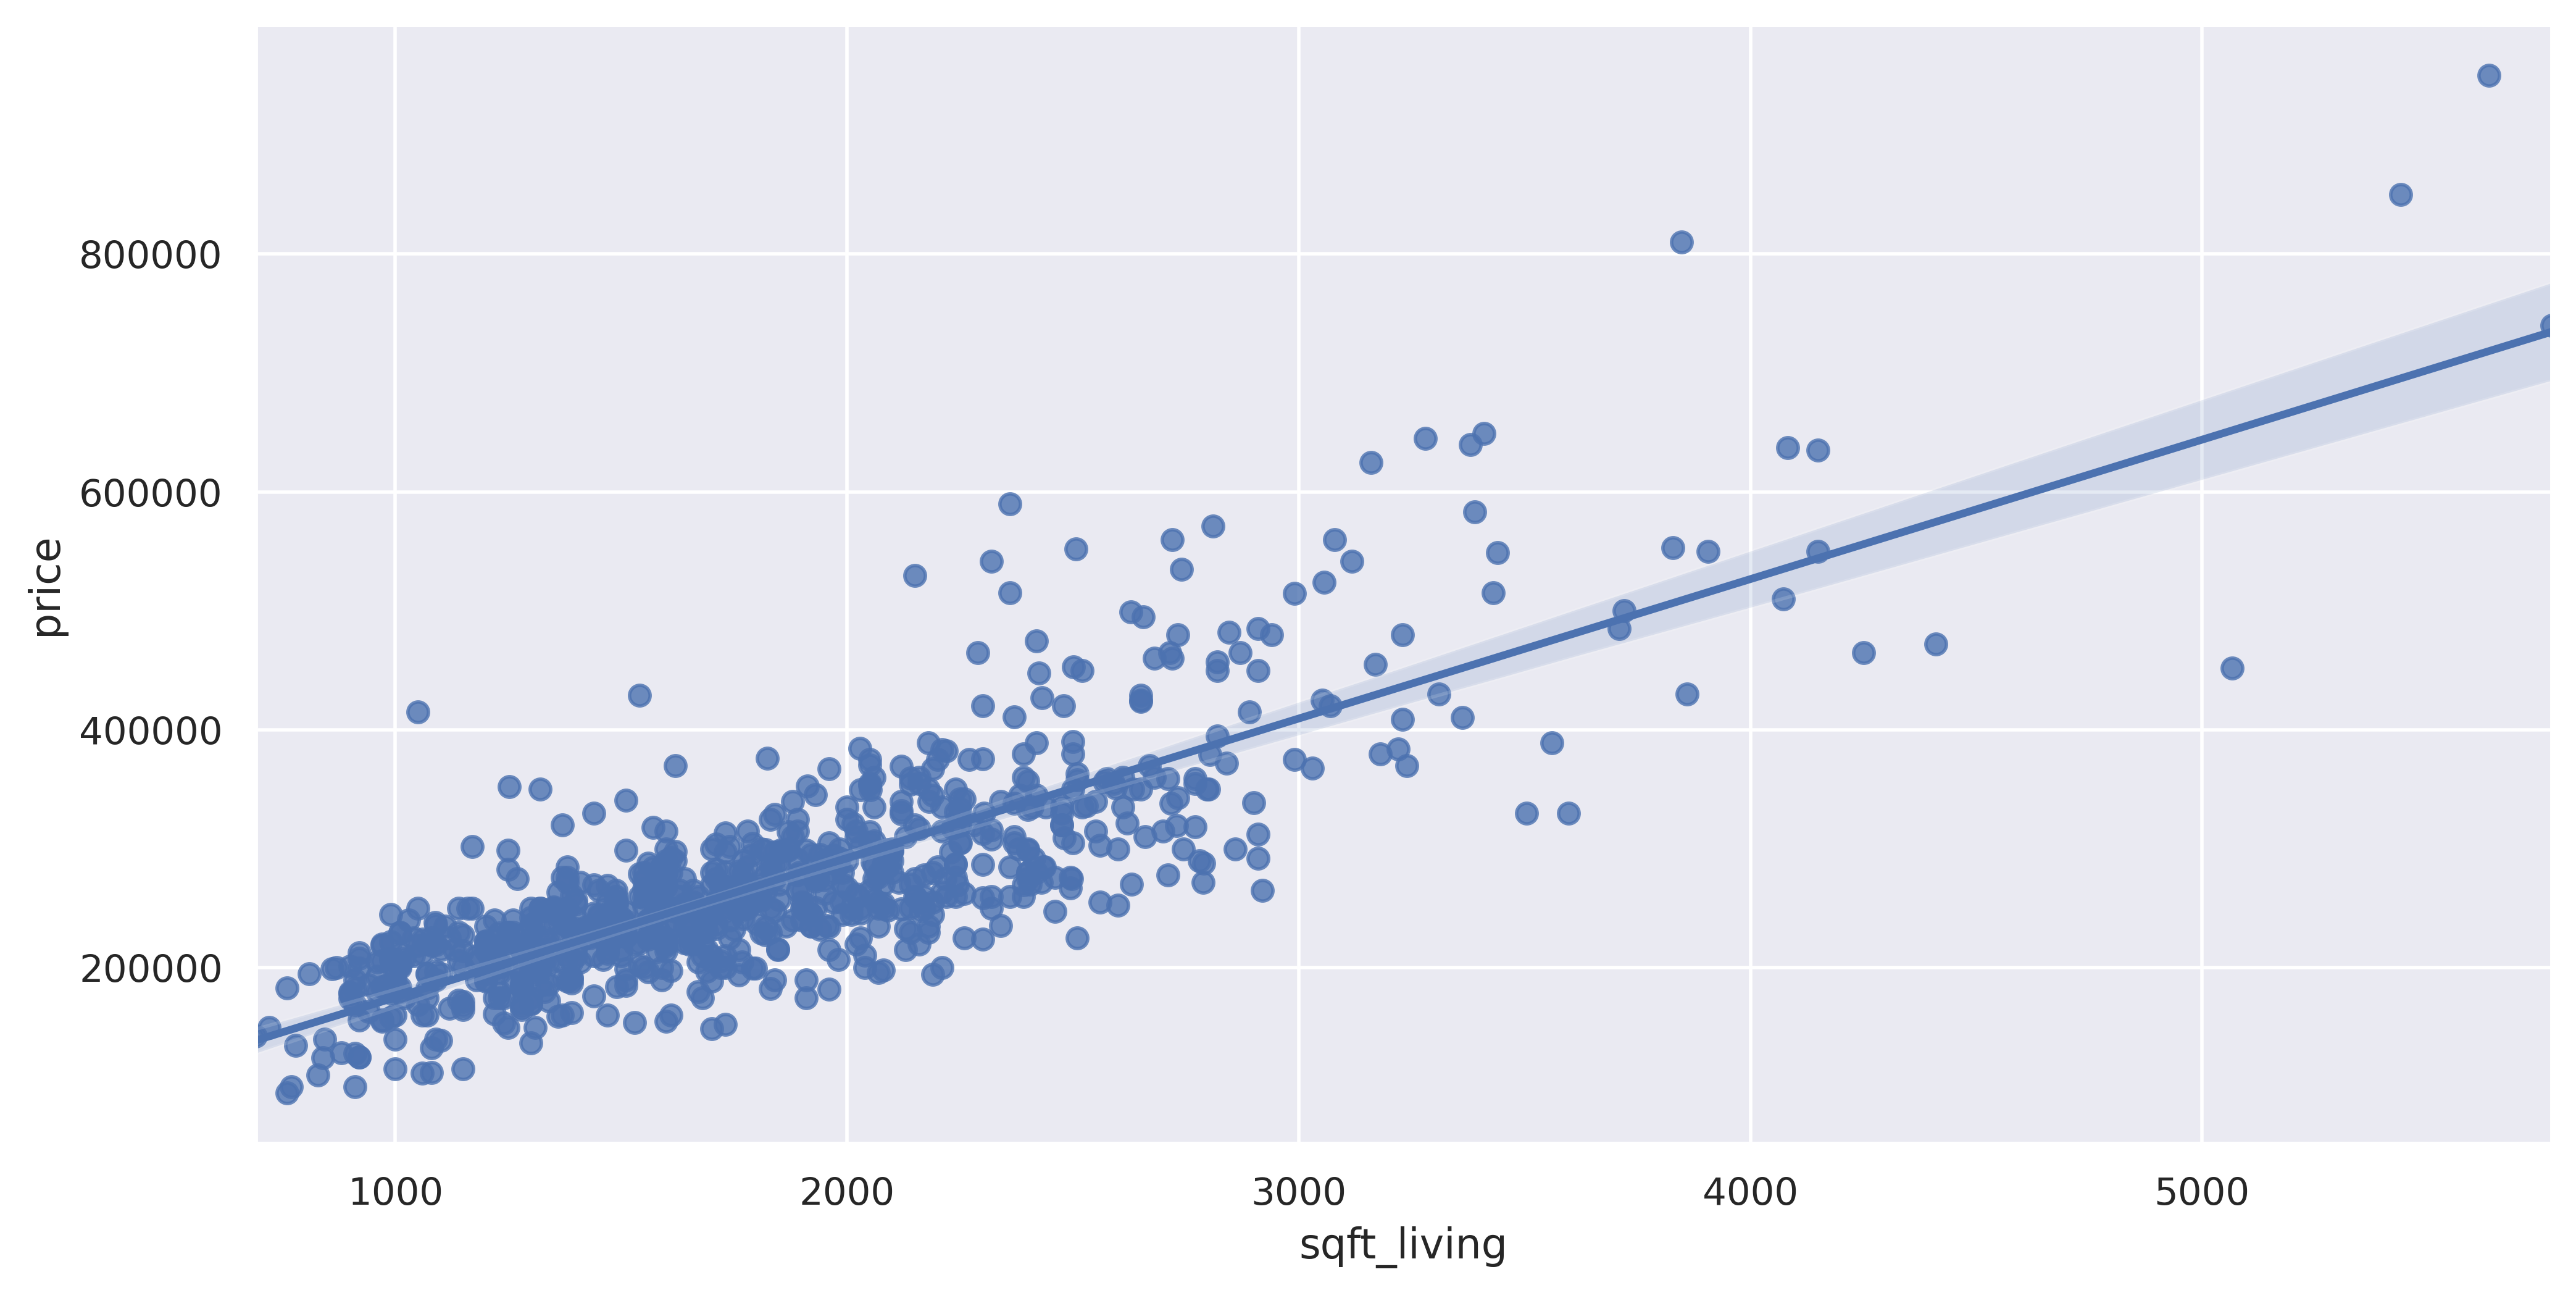

In [53]:
sns.set()
plt.figure(figsize=(12,6), dpi=400)
sns.regplot(x="sqft_living", y="price", data=around_auburn)

In [7]:
X = new_house_data['sqft_living'].values
y = new_house_data['price'].values

In [9]:
X = X.reshape(-1,1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [11]:
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (289, 1)
y_train shape (289,)
X_test shape (73, 1)
y_test shape (73,)


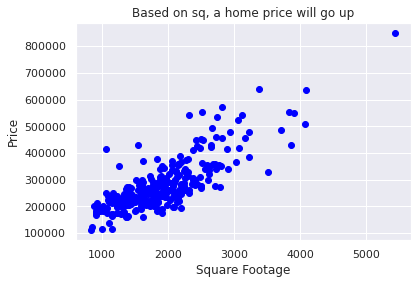

In [12]:
plt.scatter(x_train, y_train, color='blue')
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("Based on sq, a home price will go up")
plt.show()

In [13]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train, y_train) * 100,2)} %")
print(f"Test accuracy {round(lm.score(x_test, y_test) * 100,2)} %")

Train accuracy 65.32 %
Test accuracy 70.88 %


### Home price based on number of bedrooms

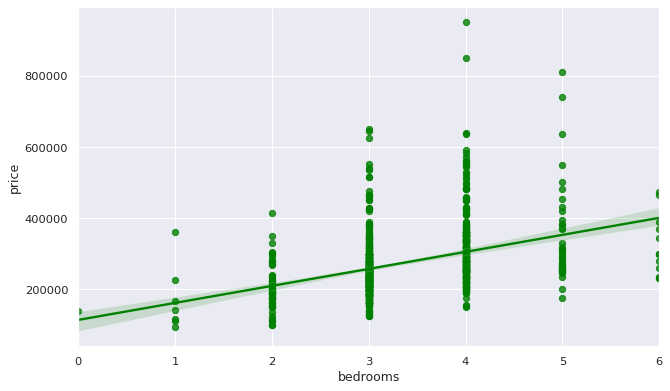

In [74]:
sns.set()
plt.figure(figsize=(10,6), dpi=75)
sns.regplot(x="bedrooms", y="price", data=around_auburn, color='green')

In [76]:

around_auburn.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,zipcode,yr_built
6,257500.0,3,2.25,1715,6819,7,98003,1995
18,189000.0,2,1.00,1200,9850,7,98002,1921
19,230000.0,3,1.00,1250,9774,7,98003,1969
25,233000.0,3,2.00,1710,4697,6,98002,1941
38,240000.0,4,1.00,1220,8075,7,98001,1969


### Home price based on year built, compared with number of bedrooms

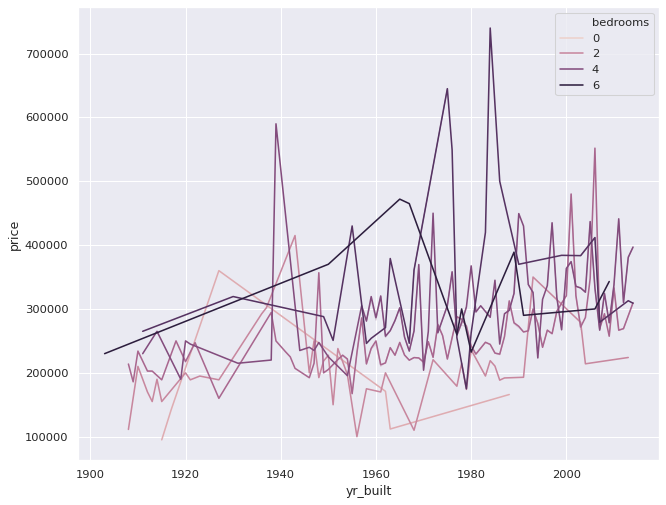

In [97]:
sns.set()
plt.figure(figsize=(10,8), dpi=75)
by_year = sns.lineplot(x = "yr_built", y = "price", data = around_auburn, hue = "bedrooms", ci=False)